# 7. 로지스틱 회귀
#### 선형 회귀 방식을 분류에 적용한 알고리즘이다.
#### 회귀가 선형인가 비선형인가는 독립변수가 아닌 가중치 변수가 선형인지 아닌지를 따릅니다.
#### 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아닌 시그모이드 함수 최적선을 찾고 시그모이드 함수의 반환 값을 확률로 간주하여 확률에 따라 분류를 결정한다.

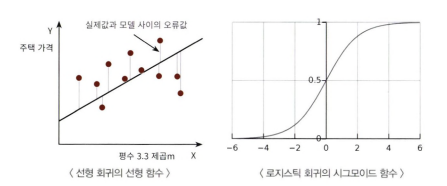
#### 시그모이드 함수는 x값이 +, -로 아무리 커져도 y 값은 항상 0과 1사이의 값을 반환한다.

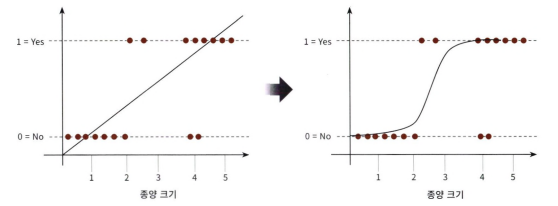
#### 선형 회귀에 비해 시그모이드 함수를 이용하면 좀 더 정확하게 0과 1에 대해서 분류를 할 수 있다.
#### 로지스틱 회귀는 이처럼 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀이다.

#### 사이킷런은 LogisticRegression 클래스를 제공한다.
#### LogisticRegression 클래스에서 solver 파라미터의 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga' 값을 적용하여 최적화를 선택할 수 있다.
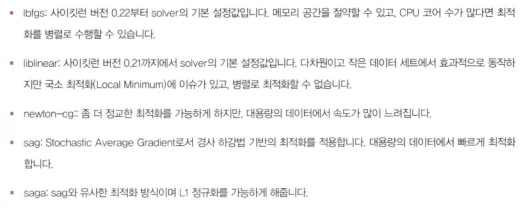

#### 사이킷런의 LogisticRegression 클래스를 이용하여 위스콘신 유방암 데이터 세트 기반에서 로지스틱 회귀로 암 여부를 판단할 것이다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

#### 선형 회귀 계열은 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 먼저 정규 분포 형태의 표준 스케일링 적용한 뒤 데이터 세트를 분리한다.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

#### 로지스틱 회귀를 이용해 학습 및 예측을 수행하고, 정확도와 ROC-AUC 값을 구해본다.
#### solver 값을 'lbfgs'로 설정하고 성능 확인

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test,lr_preds), roc_auc_score(y_test, lr_preds)))

accuracy: 0.977, roc_auc: 0.972


#### 서로 다른 solver 값으로 LogisticRegression을 학습하고 성능 평가를 수행한다

In [4]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, 
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


#### LogisticRegression의 주요 하이퍼 파라미터에는 penalty와 C가 있다.
#### penalty는 규제의 유형이면 기본은 l2이고, l1도 존재한다.
#### C는 규제 강도를 조절하는 alpha 값의 역수이다. 즉, C 값이 작을수록 규제 강도가 크다.
#### GridSearchCV를 이용해 solver, penalty, C를 최적화할 것이다.

In [5]:
from sklearn.model_selection import GridSearchCV

params={
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 1, 5, 10]
}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_so

#### solver가 liblinear, Penalty가 L2규제, C 값은 0.1일 때, 평균 정확도 0.979로 가장 좋은 성능을 나타낸다.
#### 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나다!

# 8. 회귀 트리
#### 선형 회귀는 회귀 계수를 <선형>으로 결합하는 회귀 함수를 구해, 여기에 독립변수를 입력해 결과값을 예측하는 것
#### 비선형 회귀는 회귀 계수를 <비선형>으로 결합하는 회귀 함수를 구해, 여기에 독립 변수를 입력해 결과값을 예측하는 것
#### 머신러닝 기반의 회귀는 회귀 계수를 기반으로 하는 최적 회귀 함수를 도출하는 것이 주요 목표이다
#### 여기서는 회귀 함수를 기반으로 하지 않고 결정 트리와 같은 트리를 기반으로 하는 회귀 방식에 대해서 알아본다.

#### 트리 기반의 회귀는 회귀 트리를 이용하는 것이다.
#### 회귀를 위한 트리 생성 -> 회귀 예측
#### 다만 분류 트리와의 다른 점은 리프 노드에서 예측 결정 값을 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.

#### 아래와 같이 피처가 하나인 X 피처 데이터 세트와 Y가 있다고 가정할 것이다.
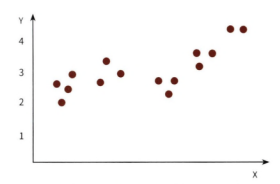

#### 데이터 세트 X 피처를 결정 트리 기반으로 분할하면 X값의 균일도를 반영한 지니 계수에 따라 아래와 같이 분리할 수 있다.
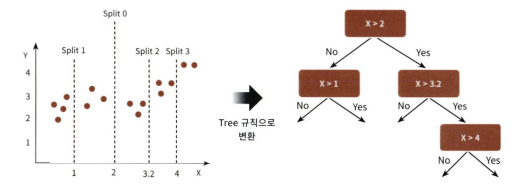

#### 리프 노드 생성 기준에 부합하는 트리 분할이 완료됐다면 리프 노드에 소속된 데이터 값의 평균값을 구해서 할당한다.
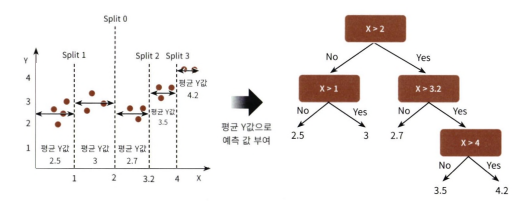

#### 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등 분류에서 소개한 모든 트리 기반 알고리즘은 회귀도 가능하다. -> CART 알고리즘에 기반하기 때문에
#### CART(Classification And Regression Trees)
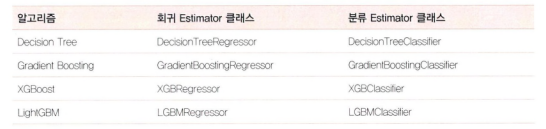

#### 사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용해 보스턴 주택 가격 예측을 수행할 것이다.
#### * 현재 보스턴 주택 가격 데이터 셋은 오류가 있기 때문에 저자 코드 참조 *

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

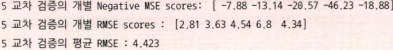

#### 랜덤 포레스트, 결정 트리, GBM, XGBoost, LightGBM를 이용해 수행한다.

In [7]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

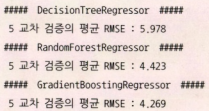
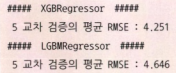

#### 회귀 트리 Regressor 클래슨느 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성은 없다. 대신 feature_importances_를 이용해 피처별 중요도를 알 수 있다.

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

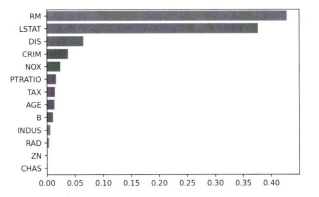

#### 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해서 시각화를 진행할 것이다.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

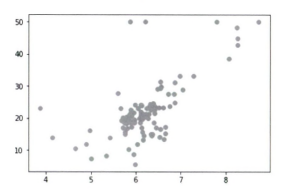

#### 보스턴 데이터 세트에 대해 LinearRegression과 DecisionTreeRegressor를 max_depth를 각 2, 7로 해서 학습한 Regressor에 100개에 대한 값의 예측값을 나타낸다.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

In [ ]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

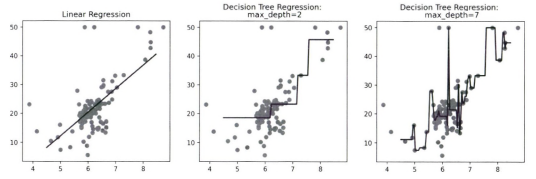

#### 선형 회귀는 직성으로 예측 회귀선을 표현하는 데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 계단 형태로 회귀선을 만든다.
#### DecisionTreeRegressor의 max_depth=7인 경우에 학습데이터의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선이 만들어지고 과적합이 되기 쉬운 모델이 되었음을 볼 수 있다.